In [57]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import time
import copy

In [58]:
#6. Encuentre los parametros usando estas expresiones para los problemas 2) y 3).

#Problema 2
Minimos="MinimosLineal.txt"
df_Minimos = pd.read_csv(Minimos, sep=" ", header=None)
x=df_Minimos[0]
y=df_Minimos[1]

def get_a0 (x, y):
    n = x.shape[0]
    y_ = y.sum()/n
    x_ = x.sum()/n
    a1 = get_a1(x,y)
    return y_ - a1*x_

def get_a1 (x, y):
    n = x.shape[0]
    xy = np.zeros_like(x)
    xy[:]=x[:]*y[:]
    xy = xy.sum()
    x2 = x**2
    x2 = x2.sum()
    X = x.sum()
    Y = y.sum()
    a1 = (xy - (X*Y)/n)/(x2-(X**2)/n)
    return a1

def get_model (x,a):
    y = 0.
    for n in range(a.shape[0]):
        y += a[n]*(x**n)
    return y

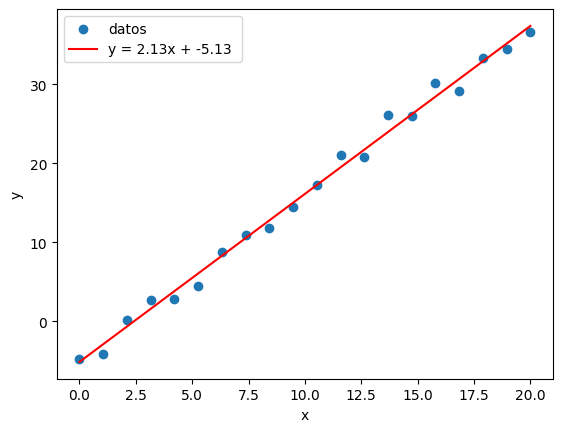

In [59]:
plt.scatter(x,y,label="datos")
plt.plot(x, get_model(x, np.array([get_a0(x,y), get_a1(x,y)])),color='r',label = f"y = {get_a1(x,y):.3}x + {get_a0(x,y):.3} ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [60]:
#Problema 3
#El grado del polinomio generado por el metodo esta relacionado con el numero de ecuaciones y parametros a. Ademas cada ecuacion es igual a
#la anterior pero se multiplica con xi.

cuadratico="MinimosCuadratico.txt"
df_cuadratico = pd.read_csv(cuadratico, sep=" ", header=None)
x1=df_cuadratico[0]
y1=df_cuadratico[1]

n = x1.shape[0]

def Get_a (x, y, n):
    
    X = np.zeros((n,n))
    Y = np.zeros(n)
    
    for i in range(n):
        m = i
        for j in range(n):
            X[i,j] = X[j,i] = (x**m).sum()
            m += 1
        Y[i] = ((x1[:]**i)*y1[:]).sum()
    
    
    return np.linalg.solve(X,Y)

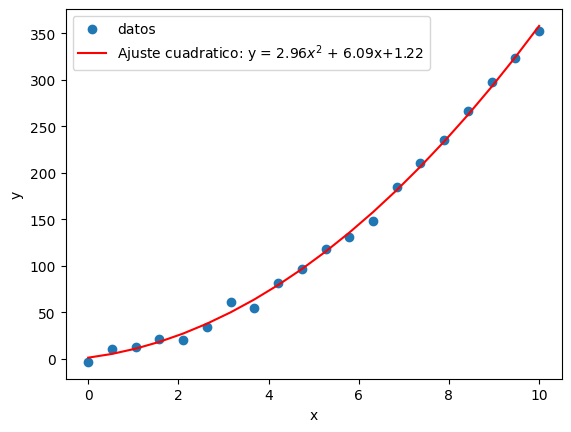

In [61]:
plt.scatter(x1,y1, label="datos")
plt.plot(x1,get_model(x1, np.array([Get_a(x1,y1,3)[0], Get_a(x1,y1,3)[1], Get_a(x1,y1,3)[2]])),color="r",label=f'Ajuste cuadratico: y = {Get_a(x1,y1,3)[2]:.2f}$x^{2}$ + {Get_a(x1,y1,3)[1]:.2f}x+{Get_a(x1,y1,3)[0]:.2f}')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [62]:
#7. Calcule la proyeccion ortogonal del vector b = (−3, −3, 8, 9) sobre el sub-espacio W generado por los vectores:
b = np.array([-3,-3,8,9])

u1 = np.array([3,1,0,1])
u2 = np.array([1,2,1,1])
u3 = np.array([-1,0,2,-1])

A = np.zeros((4,3))
A[:,0] = u1
A[:,1] = u2
A[:,2] = u3

#Encontrar los minimos cuadrados a Ax = b
A_TA = np.dot(A.T,A)
A_Tb = np.dot(A.T,b)

x = np.linalg.solve(A_TA, A_Tb)

proj_wb = np.dot(A,x)
print('proyeccion ortogonal del vector b sobre w: ',proj_wb)

#Gram-Schmidt
def Gram_Schmidt(v):
    n = len(v)
    b = []
    
    for i in range(n):
        
        u = 0
        for j in range(i):
            u += (v[i]@b[j])/(b[j]@b[j]) * b[j]
        b.append((v[i] - u)/np.linalg.norm(v[i] - u))
    
    return b

print('base ortonormal (b): ', Gram_Schmidt([u1, u2, u3]))

def proyeccion(v, b):
    
    n = len(b)
    p = 0
    for i in range(n):
        p += b[i] * np.dot(v, b[i])
    return p
        
print('proyeccion vector b sobre base b: ', proyeccion(b, Gram_Schmidt([u1, u2, u3])))

proyeccion ortogonal del vector b sobre w:  [-2.00000000e+00  3.00000000e+00  4.00000000e+00 -3.33066907e-16]
base ortonormal (b):  [array([0.90453403, 0.30151134, 0.        , 0.30151134]), array([-0.32961713,  0.75341057,  0.51796977,  0.2354408 ]), array([ 0.25633581, -0.26982716,  0.78249877, -0.49918025])]
proyeccion vector b sobre base b:  [-2.00000000e+00  3.00000000e+00  4.00000000e+00  2.22044605e-16]
